In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

EXPERIMENT_ID = 10
TRIAL_ID = 0

W tym eksperymencie przeszkody nie grają dużej roli, natomiast cel znajduje się na tyle daleko, by wymagać od ramienia mocnego wyprostowania. Cel przemieszcza się między trzema oddzielonymi strefami.

In [16]:
%%time
random_state(f"rng_states/experiment{EXPERIMENT_ID}.npy")

S = [0.3] * 120
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 3

rectangle_lists = [[((-6, 25), (-4, 35)), ((4, 25), (6, 35))]] * 3
targets = [(-10, 30), (0, 30), (10, 30)]
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangle_lists[0])

n = 1000
alpha_inf = 0.1
n_immigrants = 100
eta_c = 5.
eta_m = 30.
p_c = 0.9
p_m = np.geomspace(0.02, 0.2, d)
num_iterations_init = 4000
num_iterations = 800

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=50)
TRIAL_ID = 1
np.savez(f"/tmp/histories/experiment{EXPERIMENT_ID}_{TRIAL_ID}", populations=population_hist, scores=score_hist)

t=0
Iteration 0, #feasible: 1000, best: [586.44544352], #infeasible: 0, best: -


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 50, #feasible: 1000, best: [322.34424241], #infeasible: 0, best: -
Iteration 100, #feasible: 1000, best: [172.86258909], #infeasible: 0, best: -
Iteration 150, #feasible: 1000, best: [109.96904618], #infeasible: 0, best: -
Iteration 200, #feasible: 1000, best: [84.16519927], #infeasible: 0, best: -
Iteration 250, #feasible: 1000, best: [72.98178206], #infeasible: 0, best: -
Iteration 300, #feasible: 1000, best: [63.41683193], #infeasible: 0, best: -
Iteration 350, #feasible: 1000, best: [56.82848799], #infeasible: 0, best: -
Iteration 400, #feasible: 1000, best: [47.21464381], #infeasible: 0, best: -
Iteration 450, #feasible: 1000, best: [43.71356516], #infeasible: 0, best: -
Iteration 500, #feasible: 1000, best: [39.58504474], #infeasible: 0, best: -
Iteration 550, #feasible: 924, best: [35.33914698], #infeasible: 76, best: [44.88575787  1.        ]
Iteration 600, #feasible: 900, best: [31.07878188], #infeasible: 100, best: [38.95502491  1.        ]
Iteration 650, #feasible:

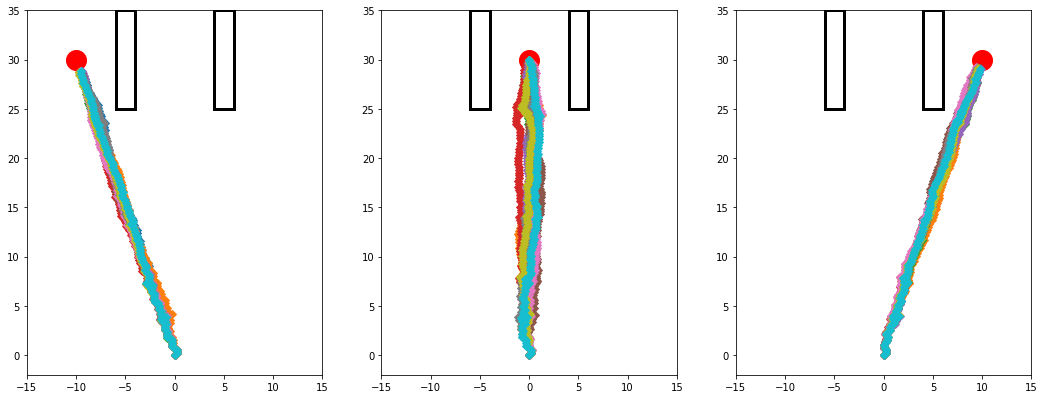

In [17]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=1, ncols=3, figsize=(18, 8), xlim=(-15, 15), ylim=(-2, 35), squeeze=False)

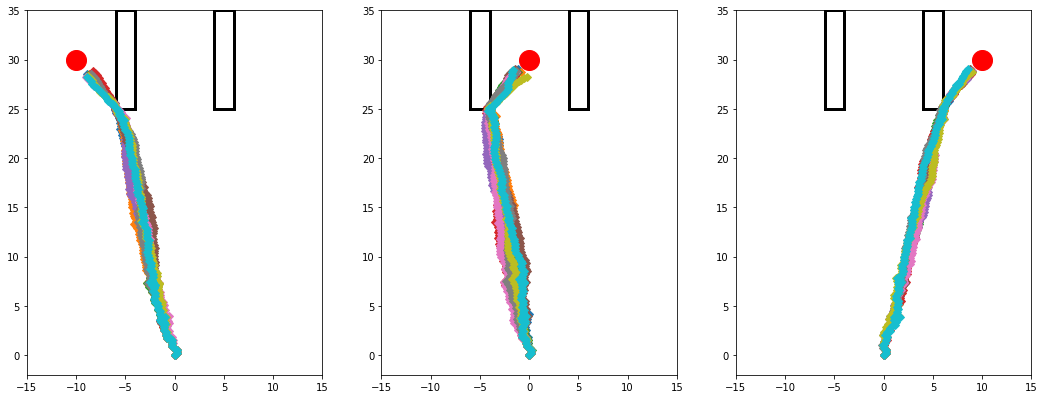

In [19]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=1, ncols=3, figsize=(18, 8), xlim=(-15, 15), ylim=(-2, 35), squeeze=False)